In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

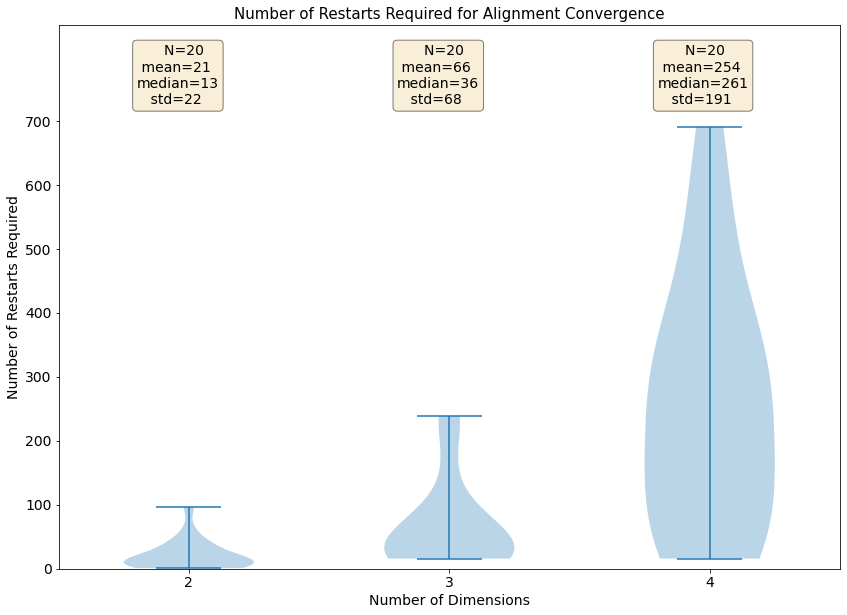

21.5 22.992390045404154 [41, 7, 13, 34, 7, 10, 16, 13, 16, 16, 97, 36, 1, 7, 4, 1, 60, 7, 34, 10]
66.45 68.92276474431361 [16, 26, 26, 66, 105, 24, 85, 239, 238, 16, 18, 169, 16, 47, 16, 17, 48, 78, 63, 16]
254.8 191.1801767966543 [124, 47, 36, 297, 17, 301, 16, 144, 272, 395, 250, 512, 347, 430, 47, 286, 162, 691, 587, 135]


In [24]:
log_dir = '../semi-supervised/logs/baseline'

N = 20

restarts = {2: [], 3:[], 4:[]}
for n_dim in range(2,5):
    for i in range(0,N):
        with open(os.path.join(log_dir, f'n_dim_{n_dim}_{i}.log'), 'r') as r:
            count = 0
            for line in r.readlines():
                if 'Restart' in line:
                    count += 1
            restarts[n_dim].append(count)
                        
# Create the boxplot
plt.figure(figsize=(14,10))
plt.title("Number of Restarts Required for Alignment Convergence", fontsize=15)
plt.violinplot(restarts.values(), positions=list(restarts.keys()))
plt.xticks(np.arange(2,5,1), fontsize=14)
plt.yticks(np.arange(0,800,100), fontsize=14)
plt.xlim(1.5,4.5)
plt.ylim(0,850,100)
plt.xlabel('Number of Dimensions',fontsize=14)
plt.ylabel('Number of Restarts Required',fontsize=14)

# statistical info box
for i in range(2,5):
    mu = np.mean(restarts[i])
    median = np.median(restarts[i])
    sigma = np.std(restarts[i])       

    textstr = '\n'.join((
        r'$N=%.1d$' % (N, ),
        r'$mean=%.1d$' % (mu, ),
        r'$median=%.1d$' % (median, ),
        r'$std=%.1d$' % (sigma, )))
    
    textstr = f'      N={N}\n mean={int(mu)}\nmedian={int(median)}\n   std={int(sigma)}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    plt.text(i-0.20, 820, textstr, fontsize=14, verticalalignment='top', bbox=props)
    
plt.savefig(f'./assets/unsupervised_baseline_restart_counts.pdf')
plt.show()
for n_dim in [2,3,4]:
    print(np.mean(restarts[n_dim]), np.std(restarts[n_dim]), restarts[n_dim])

In [122]:
logs['acc']

[]

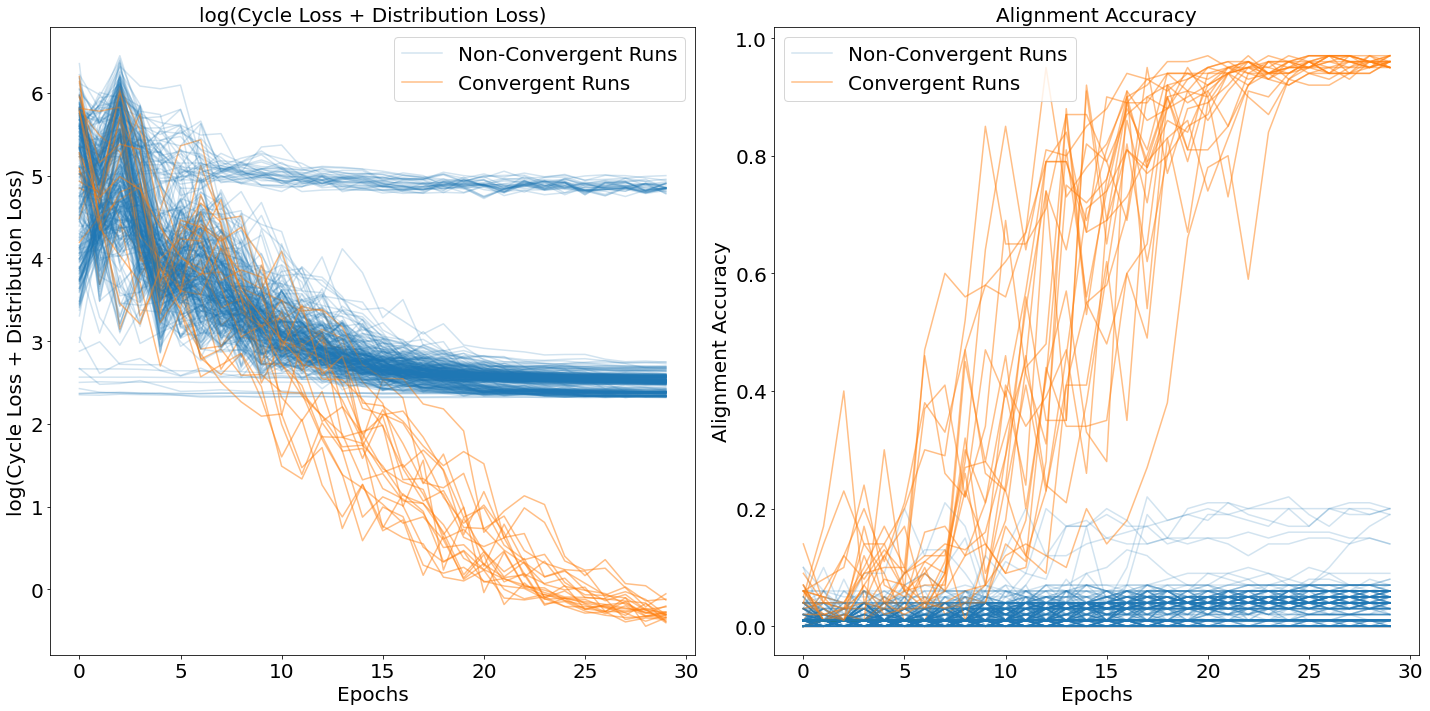

In [194]:
log_dir = '../semi-supervised/logs/baseline_2d'
fig, axes = plt.subplots(1,2,figsize=(20,10))

N = 20

n_dim = 2
# for i in range(2,N):
for i in range(1,N):
    
    with open(os.path.join(log_dir, f'n_dim_{n_dim}_{i}.log'), 'r') as r:
        for line in r.readlines():
            if 'Restart' in line:
                # Make sure the epoch has not convergent already
                if logs['acc'][0] < 0.95:
                    # Change colors and transparency based on the epochs final acc
                    if logs['acc'][-1] > 0.9:
                        alpha = 0.5
                        color = 'C1'
                    else:
                        alpha = 0.2
                        color = 'C0'

                    axes[0].plot(range(len(logs['loss'])), logs['loss'], alpha=alpha, color=color)
                    axes[1].plot(range(len(logs['acc'])), logs['acc'], alpha=alpha, color=color)
                logs = {'loss':[], 'acc':[]}
            else:
                if 'Epoch' in line:
                    loss_str, acc_str = '', ''
                    for s in line.split('f(x) Accuracy | 1: ')[1]:
                        if s == ' ':
                            break
                        else:
                            acc_str += s
                    logs['acc'].append(float(acc_str))

                    for s in line.split('Loss | total: ')[1]:
                        if s == ' ':
                            break
                        else:
                            loss_str += s
                    logs['loss'].append(np.log(float(loss_str)))

for i in range(2):
    axes[i].legend(['Non-Convergent Runs', 'Convergent Runs'], fontsize=20)
    axes[i].set_xlabel('Epochs', fontsize=20)
    axes[i].tick_params(axis='both', which='major', labelsize=20)
    
axes[0].set_title('log(Cycle Loss + Distribution Loss)', fontsize=20)
axes[1].set_title('Alignment Accuracy', fontsize=20)

# axes[0].set_ylabel('log(Cycle Loss + Distribution Loss)', fontsize=15)
axes[0].set_ylabel('log(Cycle Loss + Distribution Loss)', fontsize=20)
axes[1].set_ylabel('Alignment Accuracy', fontsize=20)

plt.tight_layout(pad=1.12, h_pad=None, w_pad=None, rect=None)
plt.savefig(f'./assets/baseline_loss_2d.pdf')
plt.show()